**Cell 1 — Install dependencies**

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn folium openpyxl joblib

*Cell 2 — Import libraries*

In [ ]:
import os, math, warnings, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from joblib import dump

warnings.filterwarnings("ignore", category=FutureWarning)
print(" Libraries imported successfully.")

 Libraries imported successfully.


**Cell 3 — Upload & configure file**

In [ ]:

from google.colab import files
# Upload the CSV files
uploaded = files.upload()

Saving 6. Congressional districts - 6. Congressional districts.csv to 6. Congressional districts - 6. Congressional districts.csv
Saving 5. Counties - 5. Counties.csv to 5. Counties - 5. Counties.csv
Saving 4. Utilities - 4. Utilities.csv to 4. Utilities - 4. Utilities.csv
Saving 2. Bus-level data - 2. Bus-level data.csv to 2. Bus-level data - 2. Bus-level data.csv
Saving 3. State-level data - 3. State-level data.csv to 3. State-level data - 3. State-level data.csv
Saving 1. District-level data - 1. District-level data.csv to 1. District-level data - 1. District-level data.csv


In [ ]:
import pandas as pd

# Replace 'file_name.csv' with the actual file names you uploaded
df_district_level = pd.read_csv('1. District-level data - 1. District-level data.csv')
df_state_level = pd.read_csv('3. State-level data - 3. State-level data.csv')
df_bus_level = pd.read_csv('2. Bus-level data - 2. Bus-level data.csv')
df_utilities = pd.read_csv('4. Utilities - 4. Utilities.csv')
df_counties = pd.read_csv('5. Counties - 5. Counties.csv')
df_congressional_districts = pd.read_csv('6. Congressional districts - 6. Congressional districts.csv')


/tmp/ipython-input-804949213.py:4: DtypeWarning: Columns (21,42,77,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_district_level = pd.read_csv('1. District-level data - 1. District-level data.csv')
/tmp/ipython-input-804949213.py:7: DtypeWarning: Columns (21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_utilities = pd.read_csv('4. Utilities - 4. Utilities.csv')


#1.Total Number of School Buses – representing the fleet size in each state.
Year 2024

In [ ]:
# Ensure all dataframes have a consistent column name 'State'
df_district_level.rename(columns={'1a. State': 'State'}, inplace=True)
df_state_level.rename(columns={'1a. State': 'State'}, inplace=True)
df_bus_level.rename(columns={'1a. State': 'State'}, inplace=True)
df_utilities.rename(columns={'1a. State': 'State'}, inplace=True)
df_counties.rename(columns={'1a. State': 'State'}, inplace=True)
df_congressional_districts.rename(columns={'1a. State': 'State'}, inplace=True)

In [ ]:
# Select columns 'State' (Column 1) and '2a. Total number of school buses (WRI 2024)' (Column 4)
df_state_level_subset = df_state_level[['State', '2a. Total number of school buses (WRI 2024)']]

# Display the first few rows of the selected columns
# After removing last row "TOTAL"

df_state_level_subset_dropped = df_state_level_subset.drop(df_state_level_subset.index[-1])

print(df_state_level_subset_dropped.tail(50))


                   State 2a. Total number of school buses (WRI 2024)
6               COLORADO                                         NaN
7            CONNECTICUT                                       8,804
8               DELAWARE                                       1,551
9   DISTRICT OF COLUMBIA                                         683
10               FLORIDA                                      17,949
11               GEORGIA                                      20,125
12                  GUAM                                         NaN
13                HAWAII                                         NaN
14                 IDAHO                                       3,058
15              ILLINOIS                                      21,820
16               INDIANA                                      15,666
17                  IOWA                                       6,840
18                KANSAS                                       4,115
19              KENTUCKY          

In [ ]:
# Remove commas from the 'Total number of school buses (WRI 2024)' column
df_state_level_subset_dropped['2a. Total number of school buses (WRI 2024)'] = df_state_level_subset_dropped['2a. Total number of school buses (WRI 2024)'].replace({',': ''}, regex=True)

# Convert the column to numeric (with coercion of any errors to NaN)
df_state_level_subset_dropped['2a. Total number of school buses (WRI 2024)'] = pd.to_numeric(df_state_level_subset_dropped['2a. Total number of school buses (WRI 2024)'], errors='coerce')

# Fill NaN values with 0 (or use mean, median, etc., if you prefer)
df_state_level_subset_dropped['2a. Total number of school buses (WRI 2024)'].fillna(0, inplace=True)

# Display the first few rows to confirm the changes
print(df_state_level_subset_dropped.tail())


            State  2a. Total number of school buses (WRI 2024)
51       VIRGINIA                                      16844.0
52     WASHINGTON                                      10762.0
53  WEST VIRGINIA                                       3918.0
54      WISCONSIN                                      10913.0
55        WYOMING                                       1828.0


/tmp/ipython-input-1580535538.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_state_level_subset_dropped['2a. Total number of school buses (WRI 2024)'].fillna(0, inplace=True)


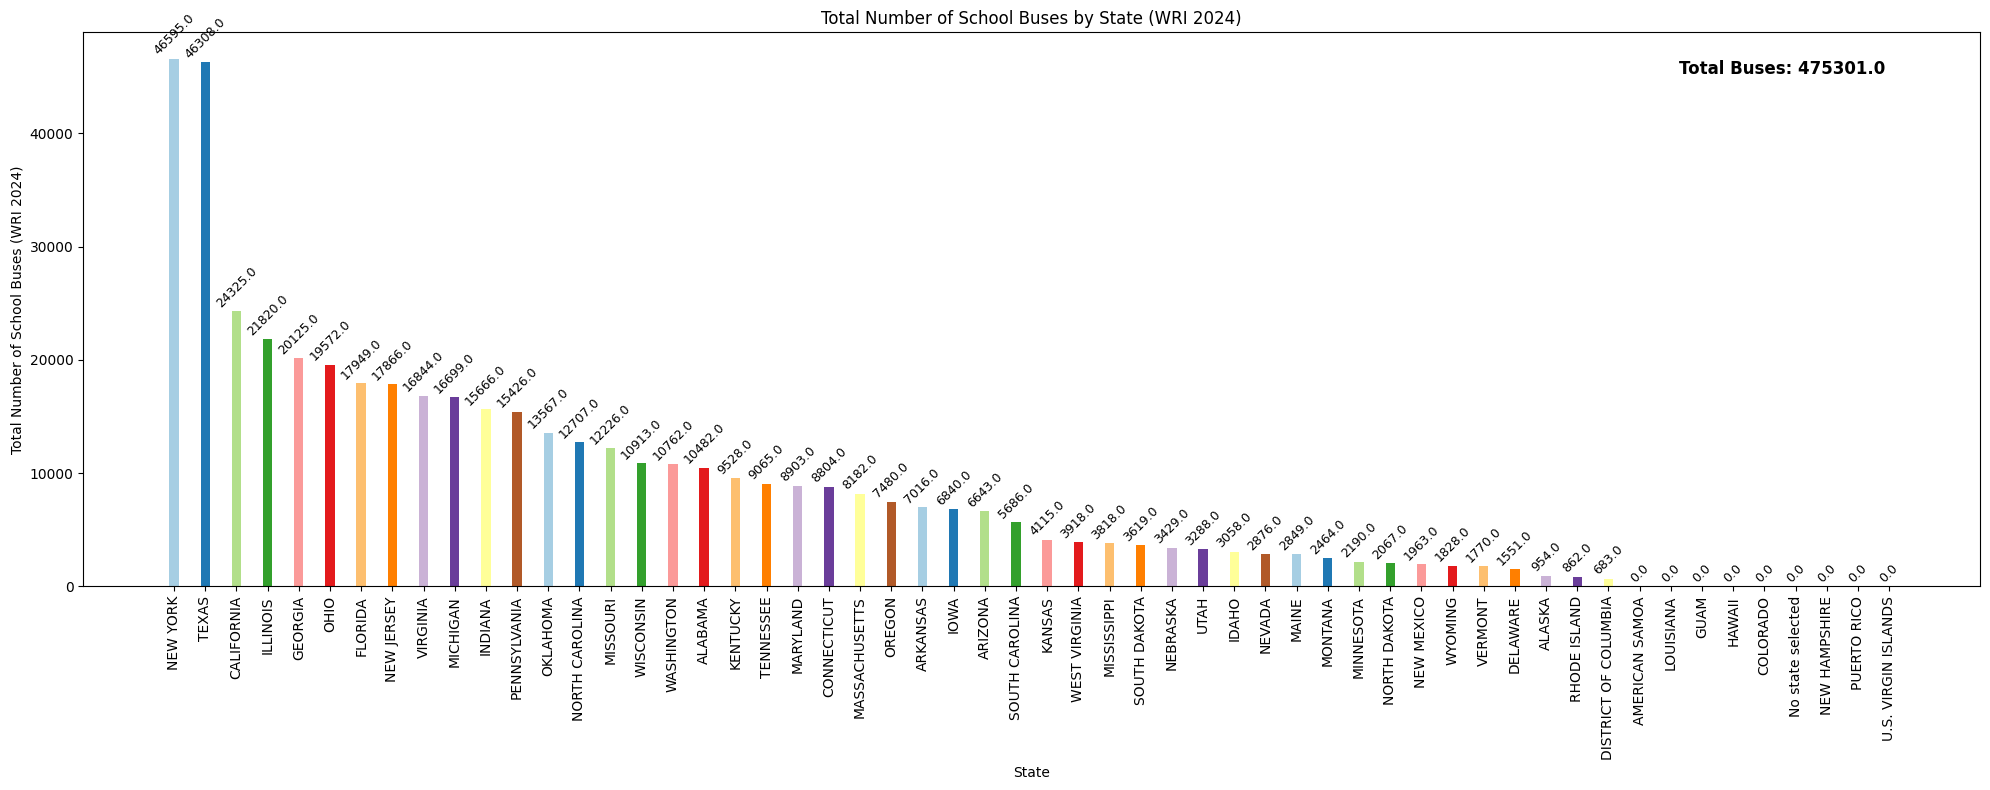

In [ ]:
import matplotlib.pyplot as plt

# Sort the data based on the total number of buses for better visualization
df_state_level_subset_dropped_sorted = df_state_level_subset_dropped.sort_values(
    by='2a. Total number of school buses (WRI 2024)', ascending=False)

# Set the width of the bars to create space between them
bar_width = 0.3  # Adjust this value to control the space between bars

# Create the bar chart with 'State' on the x-axis and 'Total number of school buses' on the y-axis
plt.figure(figsize=(20, 8))

# Create the bar chart with the specified width
bars = plt.bar(df_state_level_subset_dropped_sorted['State'],
               df_state_level_subset_dropped_sorted['2a. Total number of school buses (WRI 2024)'],
               color=plt.cm.Paired.colors[:len(df_state_level_subset_dropped_sorted)],
               width=bar_width)  # Set the width of the bars

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Total Number of School Buses (WRI 2024)')
plt.title('Total Number of School Buses by State (WRI 2024)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add the number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 100,  # Position text above bars
             round(yval, 0), ha='center', va='bottom', fontsize=9, rotation=45)

# Calculate the total number of buses and display it in the top-right corner
total_buses = df_state_level_subset_dropped_sorted['2a. Total number of school buses (WRI 2024)'].sum()
plt.text(0.95, 0.95, f'Total Buses: {round(total_buses, 0)}', ha='right', va='top',
         transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

# Adjust layout to avoid label cutoff and display the bar chart
plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()


#2. Number of Electric School Buses (ESBs) – the current deployment of electric buses. (2024)

###Too many null values

In [ ]:
# Extract only the 'State' and '3b. Number of delivered or operating ESBs' columns
df_district_esbs = df_district_level[['State', '3b. Number of delivered or operating ESBs']]

# Step 1: Group by 'State' and sum the '3b. Number of delivered or operating ESBs' for each state
df_grouped_esbs = df_district_esbs.groupby('State').agg({
    '3b. Number of delivered or operating ESBs': 'sum'  # Sum the delivered or operating ESBs per state
}).reset_index()

# Step 2: Display the grouped data
print(df_grouped_esbs.tail())



            State  3b. Number of delivered or operating ESBs
51       VIRGINIA                                      280.0
52     WASHINGTON                                       82.0
53  WEST VIRGINIA                                       15.0
54      WISCONSIN                                       30.0
55        WYOMING                                        0.0


#3. Percentage of ESB Adoption – calculated as (Number of ESBs / Total Buses) × 100 to indicate adoption rate.

####Percentage of ESB Adoption = (Number of ESBs / Total Buses) × 100 (total bus = 475301)

In [ ]:
# Step 1: Remove the last row where the 'State' is "#TOTAL"
df_esb_adoption = df_state_level[['State', '3a. Number of committed ESBs']]

# Filter out the row where 'State' is '#TOTAL'
df_esb_adoption = df_esb_adoption[df_esb_adoption['State'] != '#TOTAL']

# Step 2: Remove commas (if present) and convert to numeric values
df_esb_adoption['3a. Number of committed ESBs'] = df_esb_adoption['3a. Number of committed ESBs'].replace({',': ''}, regex=True)
df_esb_adoption['3a. Number of committed ESBs'] = pd.to_numeric(df_esb_adoption['3a. Number of committed ESBs'], errors='coerce')

# Step 3: Define the total number of buses (given as 475,301)
total_buses = 475301

# Step 4: Calculate the Percentage of ESB Adoption for each state
df_esb_adoption['ESB Adoption Percentage'] = (df_esb_adoption['3a. Number of committed ESBs'] / total_buses) * 100

# Step 5: Group by State and calculate the average (or sum, depending on what you need)
# Here we assume each state has one entry, but we aggregate anyway just in case
df_grouped_esb_adoption = df_esb_adoption.groupby('State').agg({
    '3a. Number of committed ESBs': 'sum',  # Sum the committed ESBs (if there are multiple rows per state)
    'ESB Adoption Percentage': 'mean'  # Average the ESB adoption percentage (if necessary)
}).reset_index()

# Step 6: Display the grouped DataFrame
print(df_grouped_esb_adoption.tail())





            State  3a. Number of committed ESBs  ESB Adoption Percentage
51       VIRGINIA                           383                 0.080581
52     WASHINGTON                           263                 0.055333
53  WEST VIRGINIA                           109                 0.022933
54      WISCONSIN                           141                 0.029665
55        WYOMING                             0                 0.000000


#4. Funding/Grants for ESB Purchase – total federal, state, or local funding allocated for electric buses.

####3ab. Dollar amount toward bus + 3ae. Dollar amount toward charger


### Data corrupt XXX

In [ ]:
# Extract only the 'State', 'Bus Budget' (3ab), and 'Charger Budget' (3ae) columns
df_state_budget = df_bus_funding[['State', '3ab. Dollar amount toward bus', '3ae. Dollar amount toward charger']]

# Display the result (only State, Bus Budget, and Charger Budget)
print(df_state_budget.tail())





            State  3ab. Dollar amount toward bus  \
12544  CALIFORNIA                            NaN   
12545  CALIFORNIA                            NaN   
12546  CALIFORNIA                            NaN   
12547  CALIFORNIA                            NaN   
12548      HAWAII                            NaN   

       3ae. Dollar amount toward charger  
12544                                NaN  
12545                                NaN  
12546                                NaN  
12547                                NaN  
12548                                NaN  


In [ ]:
# Check the data types of the '3ab. Dollar amount toward bus' and '3ae. Dollar amount toward charger' columns
bus_data_type = df_bus_funding['3ab. Dollar amount toward bus'].dtype
charger_data_type = df_bus_funding['3ae. Dollar amount toward charger'].dtype

# Display the data types
print(f"Data type of '3ab. Dollar amount toward bus': {bus_data_type}")
print(f"Data type of '3ae. Dollar amount toward charger': {charger_data_type}")


Data type of '3ab. Dollar amount toward bus': float64
Data type of '3ae. Dollar amount toward charger': float64


In [ ]:
# Inspect the raw values in '3ab. Dollar amount toward bus' and '3ae. Dollar amount toward charger'
print("Raw values in '3ab. Dollar amount toward bus':")
print(df_bus_funding['3ab. Dollar amount toward bus'].head())

print("\nRaw values in '3ae. Dollar amount toward charger':")
print(df_bus_funding['3ae. Dollar amount toward charger'].head())

Raw values in '3ab. Dollar amount toward bus':
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 3ab. Dollar amount toward bus, dtype: float64

Raw values in '3ae. Dollar amount toward charger':
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 3ae. Dollar amount toward charger, dtype: float64


#5 Average Age of Fleet – as older fleets may adopt ESBs at a slower pace.

In [ ]:
# Check all columns in the bus-level dataset to see if there is any data related to age or first operating year
print(df_bus_level.columns)
#print(df_state_level.columns)
#print(df_district_level.columns)


Index(['State', '1b. LEA or entity name', '1c. LEA ID', '1f. City',
       '2c. Fleet operator 1', '2c. Fleet operator 2',
       '3a. Number of ESBs committed ', '3n. Current status of bus',
       '3o. Batch', '3p. Quarter awarded', '3q. Quarter ordered',
       '3r. Quarter delivered', '3s. Quarter first operating', '3t. Bus OEM',
       '3u. Electric powertrain manufacturer', '3v. Model', '3w. Type',
       '3x. Dealer', '3y. Multiple funding sources used?',
       '3z. Funding source 1', '3aa. Agency administering funds 1',
       '3z. Funding source 2', '3aa. Agency administering funds 2',
       '3z. Funding source 3', '3aa. Agency administering funds 3',
       '3z. Funding source 4', '3aa. Agency administering funds 4',
       '3ab. Dollar amount toward bus', '3ac. Charging company',
       '3ad. Charging funding source', '3ae. Dollar amount toward charger',
       'First Operating Year', 'Bus Age'],
      dtype='object')


####
'''
First Operating Quarter: The column 3s. Quarter first operating contains information about when each bus started operating. We can convert this into a year.

Current Year: Using the current year (2025, for example), we can subtract the first operating year from the current year to calculate the age of each bus.

Average Age: After calculating the age for each bus, we can compute the average age of the fleet.

But this is probably for ESBs

'''

In [ ]:
# Convert '3s. Quarter first operating' to year (if it's in a quarter format, e.g., 'Q1 2015')
df_bus_level['First Operating Year'] = df_bus_level['3s. Quarter first operating'].str.extract(r'(\d{4})')

# Convert the 'First Operating Year' column to numeric (if necessary)
df_bus_level['First Operating Year'] = pd.to_numeric(df_bus_level['First Operating Year'], errors='coerce')

# Get the current year (e.g., 2025)
current_year = 2025

# Calculate the age of each bus (current year - first operating year)
df_bus_level['Bus Age'] = current_year - df_bus_level['First Operating Year']

# Group by 'State' and calculate the average age of buses in each state
df_state_avg_age = df_bus_level.groupby('State')['Bus Age'].mean().reset_index()

# Rename the columns for clarity
df_state_avg_age.columns = ['State', 'Average Age of Fleet']

# Display the result (State and Average Age of Fleet)
print(df_state_avg_age)


                   State  Average Age of Fleet
0                ALABAMA              2.032258
1                 ALASKA              5.000000
2         AMERICAN SAMOA              1.000000
3                ARIZONA              1.838710
4               ARKANSAS              1.409091
5             CALIFORNIA              3.174884
6               COLORADO              2.065574
7            CONNECTICUT              1.685714
8               DELAWARE              4.000000
9   DISTRICT OF COLUMBIA              2.000000
10               FLORIDA              1.900990
11               GEORGIA              1.790909
12                  GUAM                   NaN
13                HAWAII              2.666667
14                 IDAHO              1.000000
15              ILLINOIS              1.920213
16               INDIANA              2.000000
17                  IOWA              1.862069
18                KANSAS              1.823529
19              KENTUCKY              1.840580
20           

#6 State Population / Student Count – larger populations may influence fleet size and adoption.

In [ ]:
# Extract the relevant columns ('State' and 'Number of students in district')
df_district_population = df_district_level[['State', '4b. Number of students in district']]

# Convert '4b. Number of students in district' to numeric (if necessary)
df_district_population['4b. Number of students in district'] = pd.to_numeric(df_district_population['4b. Number of students in district'], errors='coerce')

# Group by 'State' and calculate the sum of the student population for each state
df_state_population = df_district_population.groupby('State')['4b. Number of students in district'].sum().reset_index()

# Rename the column for clarity
df_state_population.columns = ['State', 'Total Student Population']

# Display the result (State and Total Student Population)
print(df_state_population)


                   State  Total Student Population
0                ALABAMA                   10594.0
1                 ALASKA                   12375.0
2         AMERICAN SAMOA                       0.0
3                ARIZONA                  166646.0
4               ARKANSAS                   81082.0
5             CALIFORNIA                  467751.0
6               COLORADO                   38354.0
7            CONNECTICUT                   36471.0
8               DELAWARE                    9270.0
9   DISTRICT OF COLUMBIA                   18498.0
10               FLORIDA                    3881.0
11               GEORGIA                   26886.0
12                  GUAM                       0.0
13                HAWAII                       0.0
14                 IDAHO                   43352.0
15              ILLINOIS                  231034.0
16               INDIANA                   83741.0
17                  IOWA                  108413.0
18                KANSAS       

/tmp/ipython-input-2744327438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_district_population['4b. Number of students in district'] = pd.to_numeric(df_district_population['4b. Number of students in district'], errors='coerce')


#7 Geographic/Environmental Factors (optional) – such as average route distances or terrain affecting feasibility. X

####not available

#----------------------


#8 Charging Infrastructure Availability – number of public or school-based charging stations. X

####not available

#-----------------

# ESB Delivery or Commitment Status – number of buses committed, ordered, or delivered.

In [ ]:
print(df_district_level.columns)

Index(['0a. Has committed ESBs?', 'State',
       '1b. Local Education Agency (LEA) or entity name', '1c. LEA ID',
       '1d. Street address 1', '1e. Street address 2', '1f. City', '1g. State',
       '1h. ZIP code', '1i. Website', '1j. Has LEA ID?',
       '1k. LEA type (number)', '1l. LEA type (name)',
       '1m. Supervisory union LEA ID', '1n. Locale (full number)',
       '1o. Locale broad type (number)', '1p. Locale broad type (name)',
       '1q. Census Region', '1r. Census Division', '1s. Latitude',
       '1t. Longitude ', '2a. Total number of buses',
       '2b. Contractor used for some or all of buses?',
       '3a. Number of ESBs committed ',
       '3b. Number of delivered or operating ESBs',
       '3c. Number of ESBs awarded', '3d. Number of ESBs ordered',
       '3e. Number of ESBs delivered', '3f. Number of ESBs operating',
       '3g. Number of batches', '3h. Size of batch 1', '3h. Size of batch 2',
       '3h. Size of batch 3', '3h. Size of batch 4', '3h. Size of ba

In [ ]:
# Extract relevant columns from the district-level data
df_district_esb_status = df_district_level[['State',
                                            '3a. Number of ESBs committed ',
                                            '3c. Number of ESBs awarded',
                                            '3d. Number of ESBs ordered',
                                            '3e. Number of ESBs delivered']]

# Convert all columns to numeric (if necessary)
df_district_esb_status['3a. Number of ESBs committed'] = pd.to_numeric(df_district_esb_status['3a. Number of ESBs committed '], errors='coerce')
df_district_esb_status['3c. Number of ESBs awarded'] = pd.to_numeric(df_district_esb_status['3c. Number of ESBs awarded'], errors='coerce')
df_district_esb_status['3d. Number of ESBs ordered'] = pd.to_numeric(df_district_esb_status['3d. Number of ESBs ordered'], errors='coerce')
df_district_esb_status['3e. Number of ESBs delivered'] = pd.to_numeric(df_district_esb_status['3e. Number of ESBs delivered'], errors='coerce')

# Group by 'State' and sum the values for each state
df_state_esb_status = df_district_esb_status.groupby('State')[['3a. Number of ESBs committed',
                                                             '3c. Number of ESBs awarded',
                                                             '3d. Number of ESBs ordered',
                                                             '3e. Number of ESBs delivered']].sum().reset_index()

# Add a new column "Total ESB Status" that combines the values
df_state_esb_status['Total ESB commited/awarded/ordered/delivered'] = (df_state_esb_status['3a. Number of ESBs committed'] +
                                            df_state_esb_status['3c. Number of ESBs awarded'] +
                                            df_state_esb_status['3d. Number of ESBs ordered'] +
                                            df_state_esb_status['3e. Number of ESBs delivered'])

# Display the final DataFrame with State and the new "Total ESB Status" column
print(df_state_esb_status[['State', 'Total ESB commited/awarded/ordered/delivered']])


                   State  Total ESB commited/awarded/ordered/delivered
0                ALABAMA                                         159.0
1                 ALASKA                                           1.0
2         AMERICAN SAMOA                                          15.0
3                ARIZONA                                         347.0
4               ARKANSAS                                         174.0
5             CALIFORNIA                                        4966.0
6               COLORADO                                         255.0
7            CONNECTICUT                                         382.0
8               DELAWARE                                           9.0
9   DISTRICT OF COLUMBIA                                          99.0
10               FLORIDA                                         732.0
11               GEORGIA                                         622.0
12                  GUAM                                          50.0
13    

/tmp/ipython-input-4255516800.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_district_esb_status['3a. Number of ESBs committed'] = pd.to_numeric(df_district_esb_status['3a. Number of ESBs committed '], errors='coerce')
/tmp/ipython-input-4255516800.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_district_esb_status['3c. Number of ESBs awarded'] = pd.to_numeric(df_district_esb_status['3c. Number of ESBs awarded'], errors='coerce')
/tmp/ipython-input-4255516800.py:11: SettingWithCopyWarning: 


#Final clustering


In [ ]:
# Step 1: Merge the DataFrames on 'State'
df_combined = df_state_level_subset_dropped[['State', '2a. Total number of school buses (WRI 2024)']] \
    .merge(df_district_esbs, on='State', how='inner') \
    .merge(df_esb_adoption[['State', 'ESB Adoption Percentage']], on='State', how='inner') \
    .merge(df_state_avg_age[['State', 'Average Age of Fleet']], on='State', how='inner') \
    .merge(df_state_population[['State', 'Total Student Population']], on='State', how='inner') \
    .merge(df_state_esb_status[['State', 'Total ESB commited/awarded/ordered/delivered']], on='State', how='inner')

# Step 2: Display the merged dataframe to check it
print(df_combined.head())

# Step 3: Check if we have 55 unique states
print(f"Number of unique states in the merged data: {df_combined['State'].nunique()}")


     State  2a. Total number of school buses (WRI 2024)  \
0  ALABAMA                                      10482.0   
1  ALABAMA                                      10482.0   
2  ALABAMA                                      10482.0   
3  ALABAMA                                      10482.0   
4  ALABAMA                                      10482.0   

   3b. Number of delivered or operating ESBs  ESB Adoption Percentage  \
0                                        0.0                 0.019987   
1                                        0.0                 0.019987   
2                                        0.0                 0.019987   
3                                        0.0                 0.019987   
4                                        0.0                 0.019987   

   Average Age of Fleet  Total Student Population  \
0              2.032258                   10594.0   
1              2.032258                   10594.0   
2              2.032258                   10594

In [ ]:
# Check the number of unique states in each DataFrame
print(f"Unique states in df_state_level_subset_dropped: {df_state_level_subset_dropped['State'].nunique()}")
print(f"Unique states in df_district_esbs: {df_district_esbs['State'].nunique()}")
print(f"Unique states in df_esb_adoption: {df_esb_adoption['State'].nunique()}")
print(f"Unique states in df_state_avg_age: {df_state_avg_age['State'].nunique()}")
print(f"Unique states in df_state_population: {df_state_population['State'].nunique()}")
print(f"Unique states in df_state_esb_status: {df_state_esb_status['State'].nunique()}")


Unique states in df_state_level_subset_dropped: 56
Unique states in df_district_esbs: 56
Unique states in df_esb_adoption: 56
Unique states in df_state_avg_age: 54
Unique states in df_state_population: 56
Unique states in df_state_esb_status: 56


In [ ]:
# Merge all the DataFrames based on the DataFrame with 56 unique states (e.g., df_state_level_subset_dropped)
df_combined = df_state_level_subset_dropped[['State', '2a. Total number of school buses (WRI 2024)']] \
    .merge(df_district_esbs, on='State', how='left') \
    .merge(df_esb_adoption[['State', 'ESB Adoption Percentage']], on='State', how='left') \
    .merge(df_state_avg_age[['State', 'Average Age of Fleet']], on='State', how='left') \
    .merge(df_state_population[['State', 'Total Student Population']], on='State', how='left') \
    .merge(df_state_esb_status[['State', 'Total ESB commited/awarded/ordered/delivered']], on='State', how='left')

# Display the merged dataframe to check it
print(df_combined.head())

# Check if we have 56 unique states in the merged data
print(f"Number of unique states in the merged data: {df_combined['State'].nunique()}")


     State  2a. Total number of school buses (WRI 2024)  \
0  ALABAMA                                      10482.0   
1  ALABAMA                                      10482.0   
2  ALABAMA                                      10482.0   
3  ALABAMA                                      10482.0   
4  ALABAMA                                      10482.0   

   3b. Number of delivered or operating ESBs  ESB Adoption Percentage  \
0                                        0.0                 0.019987   
1                                        0.0                 0.019987   
2                                        0.0                 0.019987   
3                                        0.0                 0.019987   
4                                        0.0                 0.019987   

   Average Age of Fleet  Total Student Population  \
0              2.032258                   10594.0   
1              2.032258                   10594.0   
2              2.032258                   10594

In [ ]:
# Handle missing values (optional, based on how you want to treat them)
df_combined = df_combined.fillna(0)  # Or use a different strategy like fillna(df_combined.mean())

# Display the merged data after filling NaN values
print(df_combined.head())



     State  2a. Total number of school buses (WRI 2024)  \
0  ALABAMA                                      10482.0   
1  ALABAMA                                      10482.0   
2  ALABAMA                                      10482.0   
3  ALABAMA                                      10482.0   
4  ALABAMA                                      10482.0   

   3b. Number of delivered or operating ESBs  ESB Adoption Percentage  \
0                                        0.0                 0.019987   
1                                        0.0                 0.019987   
2                                        0.0                 0.019987   
3                                        0.0                 0.019987   
4                                        0.0                 0.019987   

   Average Age of Fleet  Total Student Population  \
0              2.032258                   10594.0   
1              2.032258                   10594.0   
2              2.032258                   10594

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the relevant features for clustering (excluding 'State' column)
features = df_combined[['2a. Total number of school buses (WRI 2024)',
                        '3b. Number of delivered or operating ESBs',
                        'ESB Adoption Percentage',
                        'Average Age of Fleet',
                        'Total Student Population',
                        'Total ESB commited/awarded/ordered/delivered']]

# Normalize the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Check the scaled features (first 5 rows)
print(scaled_features[:5])


[[-0.44952117 -0.08953812 -0.53939846 -0.00431907 -1.24288332 -0.55780889]
 [-0.44952117 -0.08953812 -0.53939846 -0.00431907 -1.24288332 -0.55780889]
 [-0.44952117 -0.08953812 -0.53939846 -0.00431907 -1.24288332 -0.55780889]
 [-0.44952117 -0.08953812 -0.53939846 -0.00431907 -1.24288332 -0.55780889]
 [-0.44952117 -0.08953812 -0.53939846 -0.00431907 -1.24288332 -0.55780889]]


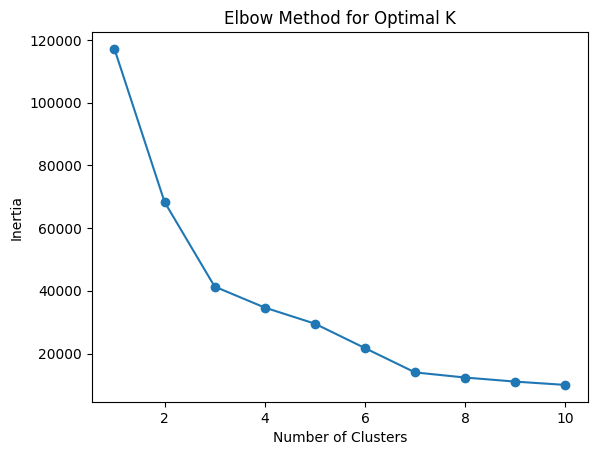

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):  # Trying values for K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method result
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Apply K-Means clustering (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust K based on the Elbow method result
df_combined['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the resulting clusters with 'State' and the assigned cluster
print(df_combined[['State', 'Cluster']])


         State  Cluster
0      ALABAMA        0
1      ALABAMA        0
2      ALABAMA        0
3      ALABAMA        0
4      ALABAMA        0
...        ...      ...
19511  WYOMING        0
19512  WYOMING        0
19513  WYOMING        0
19514  WYOMING        0
19515  WYOMING        0

[19516 rows x 2 columns]


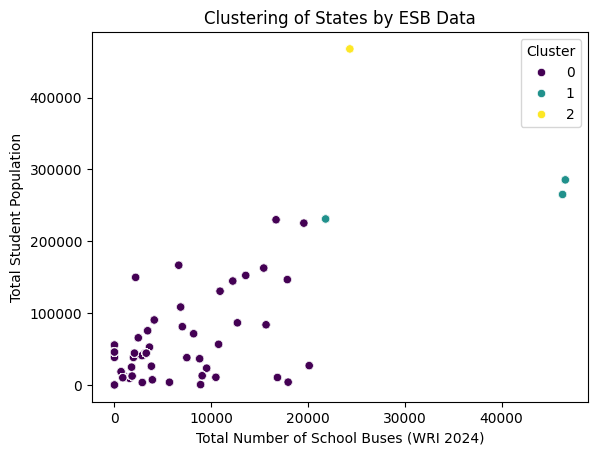

In [ ]:
import seaborn as sns

# Visualize the clusters using a scatter plot
sns.scatterplot(x=df_combined['2a. Total number of school buses (WRI 2024)'],
                y=df_combined['Total Student Population'],
                hue=df_combined['Cluster'],
                palette='viridis')

plt.title('Clustering of States by ESB Data')
plt.xlabel('Total Number of School Buses (WRI 2024)')
plt.ylabel('Total Student Population')
plt.show()


#

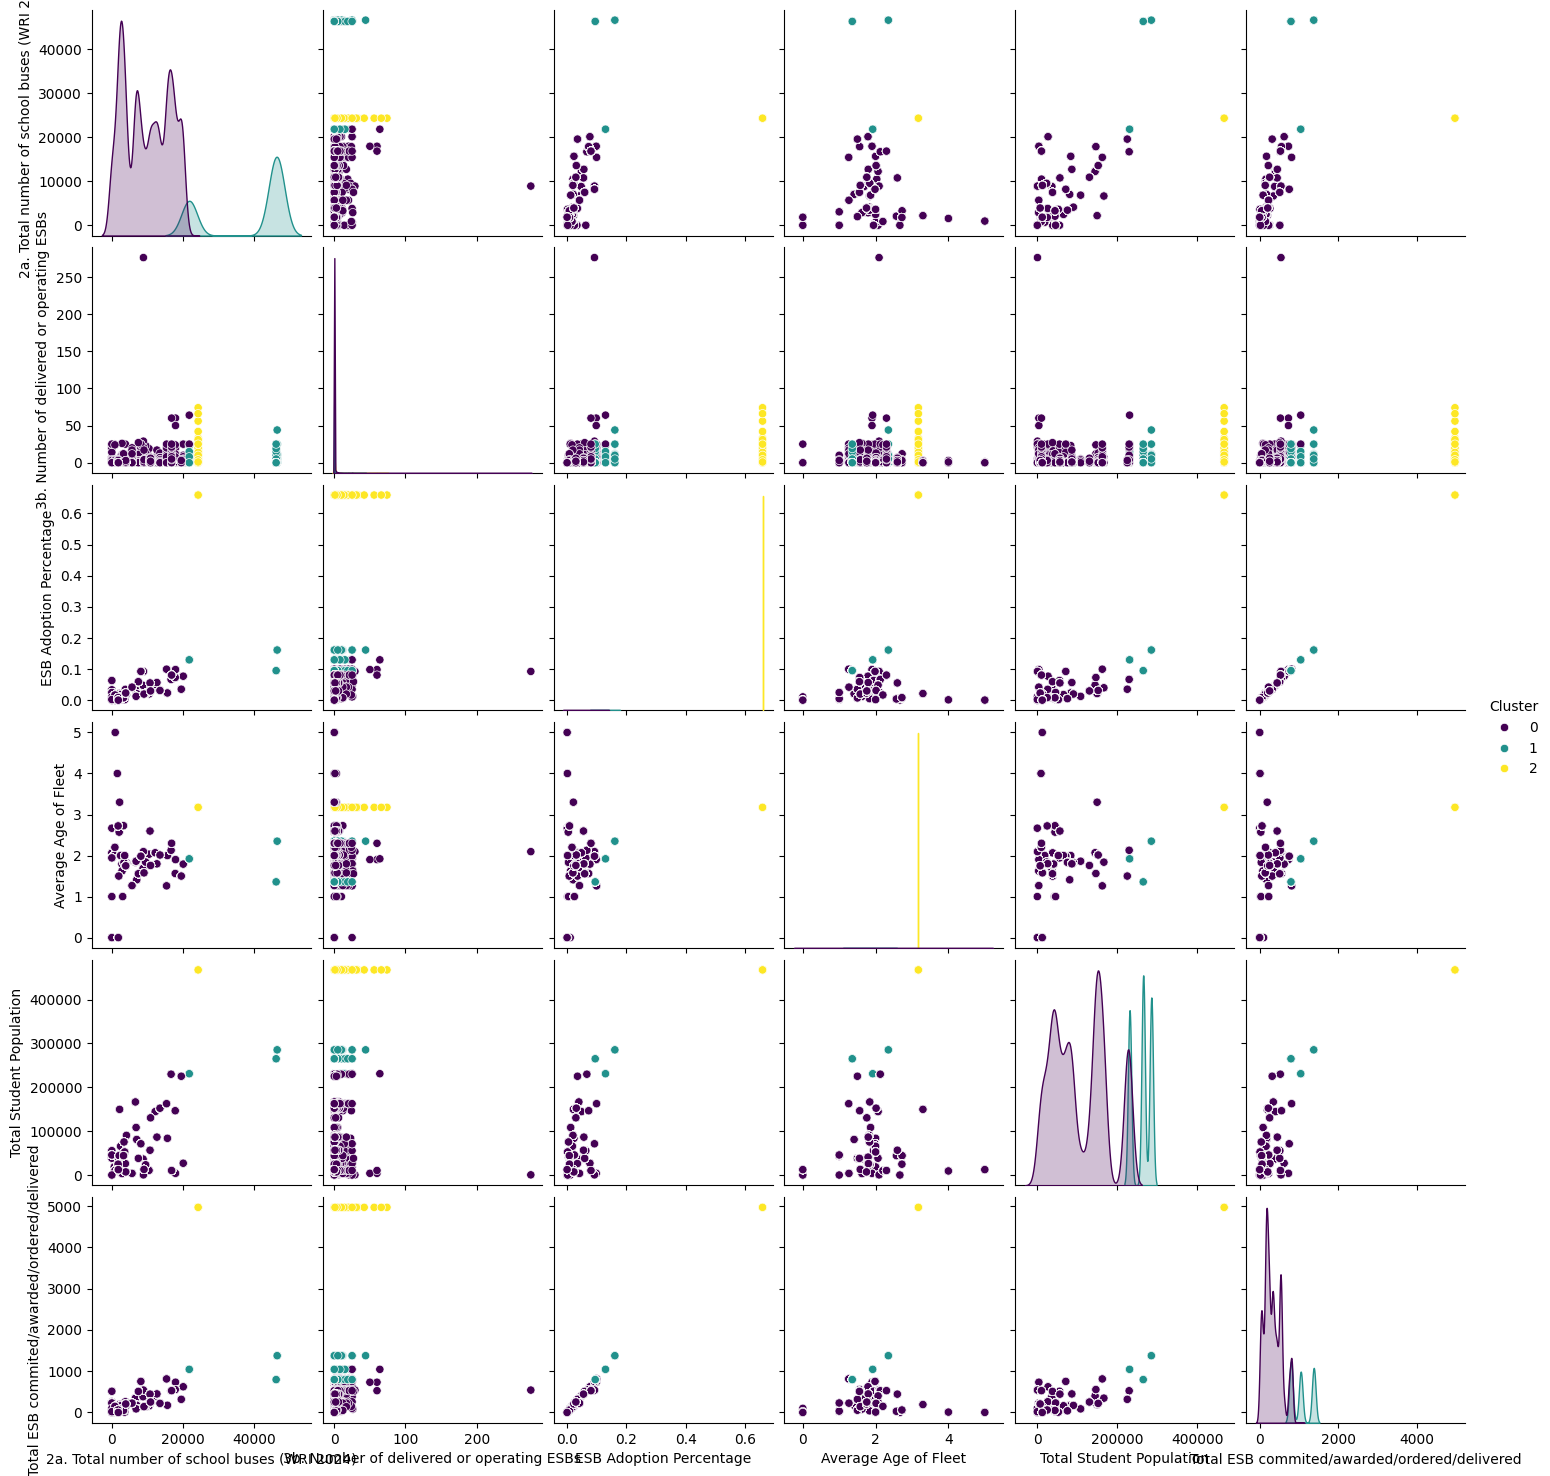

In [ ]:
# Pairwise feature plots using seaborn
sns.pairplot(df_combined[['2a. Total number of school buses (WRI 2024)',
                          '3b. Number of delivered or operating ESBs',
                          'ESB Adoption Percentage',
                          'Average Age of Fleet',
                          'Total Student Population',
                          'Total ESB commited/awarded/ordered/delivered',
                          'Cluster']],
             hue='Cluster', palette='viridis')
plt.show()


####
'''5️⃣ Key Things to Notice in the Output

When you look at the pairplot:

--Top-right scatter plots → show relationships between variables.

--Diagonal plots → show distribution (KDE curve) of each feature.

--Colors (Clusters) → tell you which states belong to which adoption group.

Example insights you might find:

--States with larger total fleets tend to have more ESBs, but adoption % still varies by funding.

--Average fleet age may cluster inversely with adoption % (younger fleets adopting faster).

--Student population may correlate with fleet size, forming a separate axis of variation.
'''

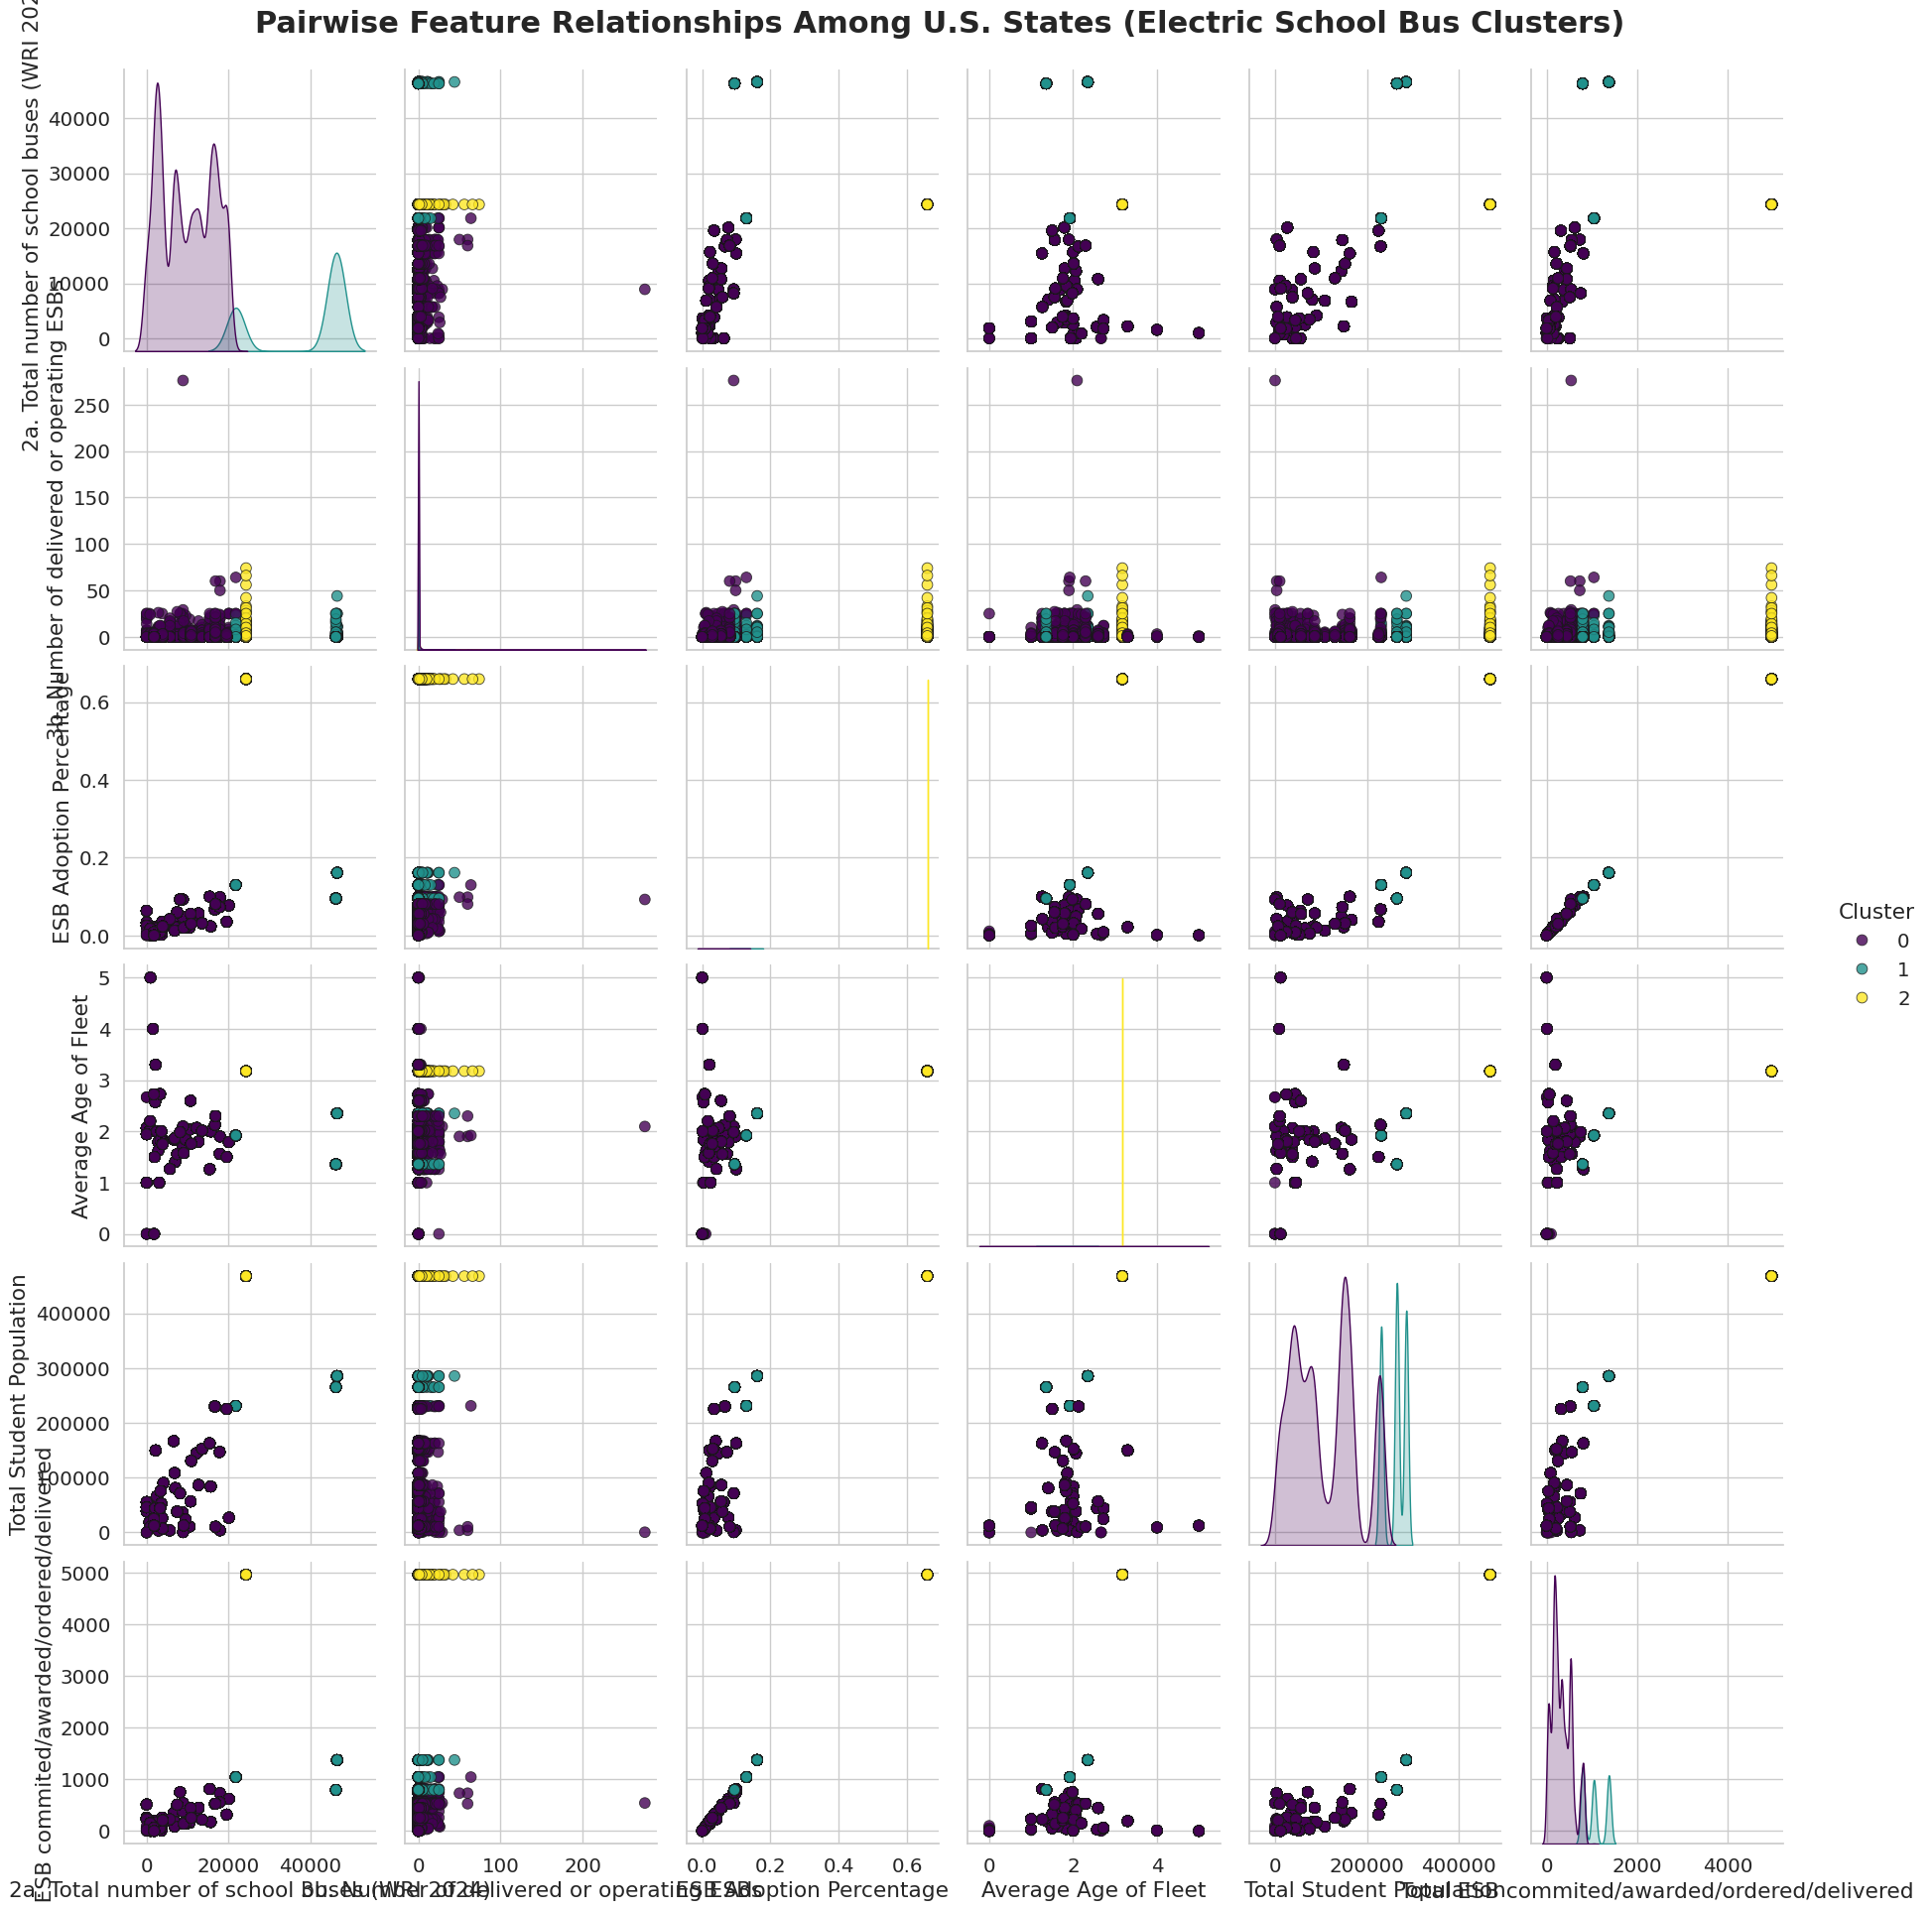

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features to visualize
features = [
    '2a. Total number of school buses (WRI 2024)',
    '3b. Number of delivered or operating ESBs',
    'ESB Adoption Percentage',
    'Average Age of Fleet',
    'Total Student Population',
    'Total ESB commited/awarded/ordered/delivered',
    'Cluster'
]

# Increase default settings for clarity
sns.set(style="whitegrid", font_scale=1.3)

# Create the pairplot
pair_plot = sns.pairplot(
    df_combined[features],
    hue="Cluster",                    # Color points by cluster
    palette="viridis",                # Distinct color map
    corner=False,                     # Show all pairwise combinations
    diag_kind="kde",                  # KDE plots on diagonal
    plot_kws={'alpha': 0.8, 's': 60, 'edgecolor': 'k'},  # Point styling
)

# Adjust figure size and resolution
pair_plot.fig.set_size_inches(20, 20)
pair_plot.fig.subplots_adjust(top=0.95)
pair_plot.fig.suptitle(
    "Pairwise Feature Relationships Among U.S. States (Electric School Bus Clusters)",
    fontsize=22,
    fontweight='bold'
)

# Save as large image for clarity
plt.savefig("ESB_cluster_pairplot_large.png", dpi=300, bbox_inches='tight')

plt.show()


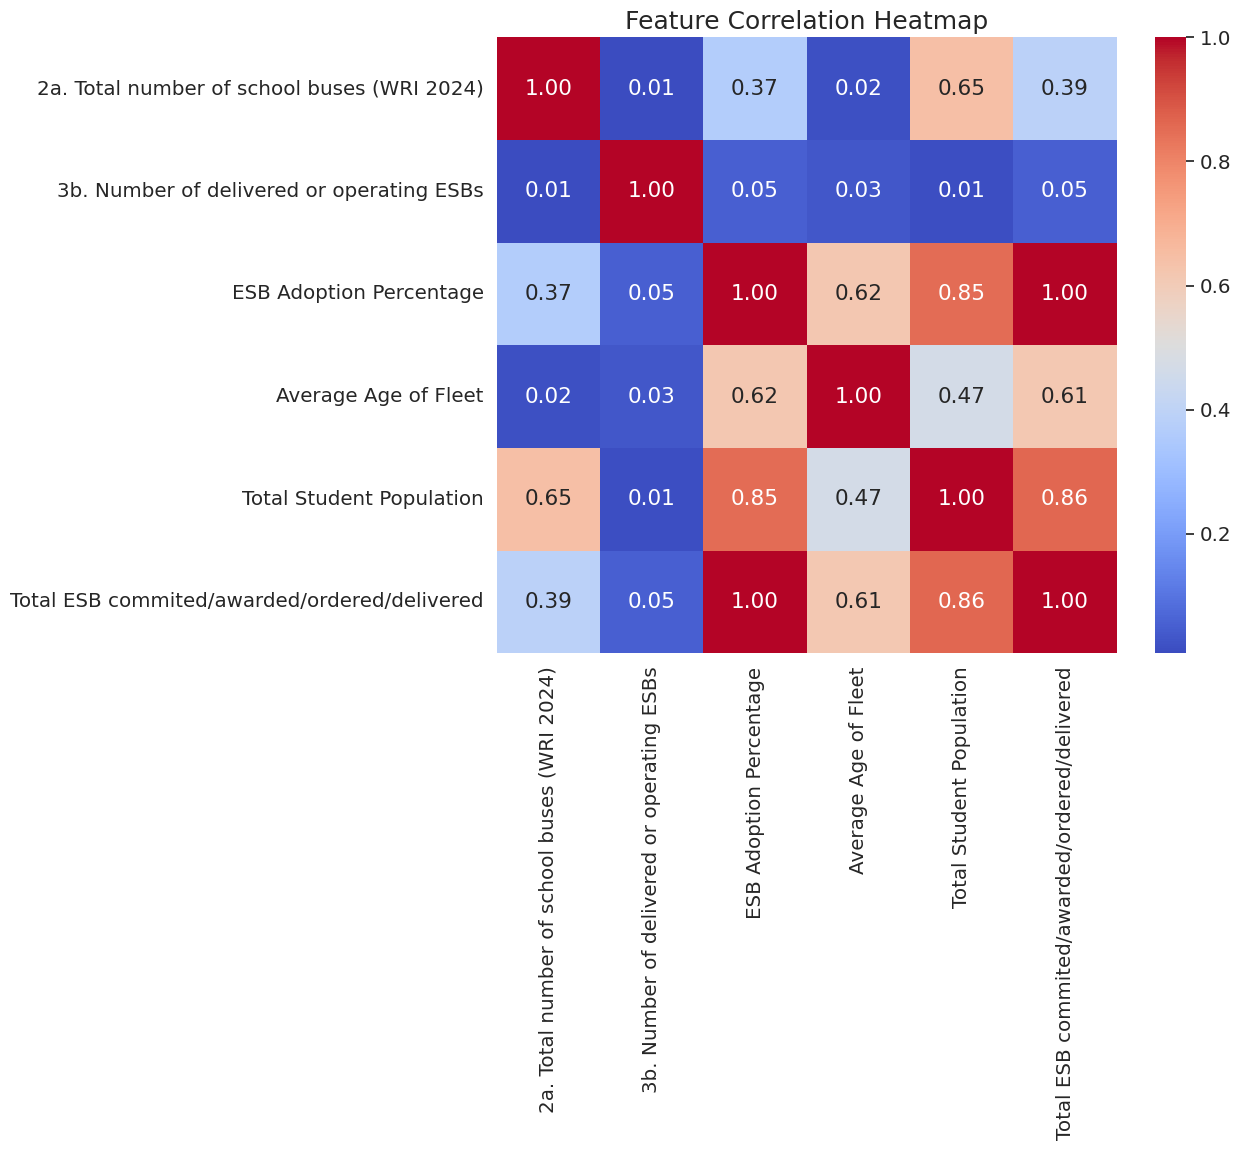

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_combined[features[:-1]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=18)
plt.show()


**Cell 5 — Load and preprocess data**

**Cell 6 — Estimate epsilon (k-distance method)**

**Cell 7 — Run DBSCAN clustering**

**Cell 8 — PCA scatter visualization**

**Cell 9 — Folium interactive map**

**Cell 10 — Summary**